For my project, I plan to analyze the performance of companies with varying levels of cash reserves during both periods of economic uncertainty. I will select 5 companies with the highest levels of cash reserves in the stock market and compare them to 5 companies with an average amount of cash reserves. In order to compare the levels of uncertainty and stability I will set the range to 30 days before the specific event and 30 days after.

In [1]:
import pandas as pd
import yfinance as yf 
import matplotlib.pyplot as plt
from datetime import datetime

yfinance is the yahoo finance api and is used to get stock prices for selected companies over a date range.

datetime is used to specify dates so that I can filter data for around specific economic events

In [2]:
high_reserve = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META']
avg_reserve = ['INTC', 'CSCO', 'ORCL', 'IBM', 'HPQ']
tickers = high_reserve + avg_reserve

Companies with high reserves are 

AAPL (Apple with 167 billion of cash in hand), 

MSFT (Microsoft with 78.42 billion of cash in hand), 

GOOGL (Google with $93.23 billion of cash in hand), 

AMZN (Amazon with 88.051 billion of cash in hand), 

and Meta (Facebook 70.9 billion of cash in hand)

Companies with average reserves are 

INTC (Intel with 24.086 billion of cash in hand), 

CSCO (Cisco with 18.67 billion of cash in hand), 

ORCL (Oracle with 10.91 billion of cash in hand), 

IBM (IBM with 13.719 billion of cash in hand), 

and HPQ (Hewlett-Packard with 3.232 billion of cash in hand)

I then combined these lists so I can retreive and analyze their stock performance in the same dataset.

In [3]:
data = yf.download(tickers, start="2020-01-01", end="2023-12-31")
stock_data = data['Close'] 

[*********************100%***********************]  10 of 10 completed


yf.download is used to get historical data from the selected comapnies in the stock market along with a start and end date.

using the close principle represents the final trading price of the stock for that day, this is a common metric used for analysis

In [4]:
print(stock_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1006 non-null   float64
 1   AMZN    1006 non-null   float64
 2   CSCO    1006 non-null   float64
 3   GOOGL   1006 non-null   float64
 4   HPQ     1006 non-null   float64
 5   IBM     1006 non-null   float64
 6   INTC    1006 non-null   float64
 7   META    1006 non-null   float64
 8   MSFT    1006 non-null   float64
 9   ORCL    1006 non-null   float64
dtypes: float64(10)
memory usage: 86.5 KB
None


This is just used so I can make sure the data was loaded correctly

In [5]:
fed_rate = datetime(2022, 3, 16)

This is the first example of the federal reserve interest rate raising. On this date, the interest rate paid on reserve balances raised to .4%

In [6]:
fedrate_window = stock_data.loc[fed_rate - pd.Timedelta(days=30):fed_rate + pd.Timedelta(days=30)]
fedrate_window.head()

Ticker,AAPL,AMZN,CSCO,GOOGL,HPQ,IBM,INTC,META,MSFT,ORCL
Date,,,,,,,,,,
2022-02-14,168.880005,155.167007,53.180000,135.526001,36.509998,130.149994,47.580002,217.699997,295.000000,78.949997
2022-02-15,172.789993,156.510498,54.270000,136.608505,37.369999,129.940002,48.439999,221.000000,300.470001,79.769997
2022-02-16,172.550003,158.100494,54.250000,137.738007,37.889999,129.179993,48.230000,216.539993,299.500000,79.190002
2022-02-17,168.880005,154.652496,55.770000,132.539001,36.419998,124.970001,47.570000,207.710007,290.730011,75.529999
2022-02-18,167.300003,152.601501,57.209999,130.403000,36.200001,124.349998,45.040001,206.160004,287.929993,74.570000


fedrate window is a subset of the stock data centered around when the federal reserve annonced a interest rate hike. timedelta  uses data from 30 days before and after march 16 2022.

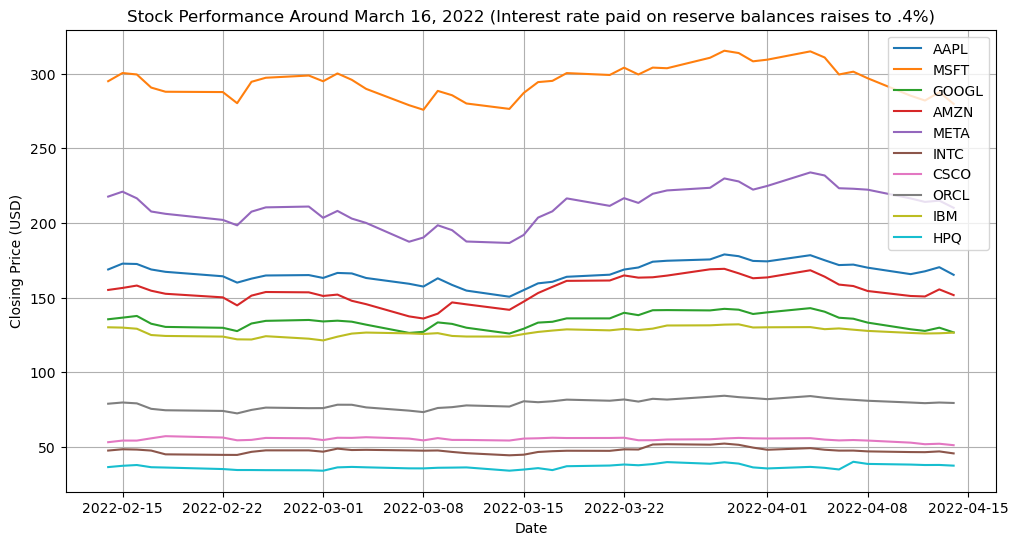

In [7]:
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(fedrate_window.index, fedrate_window[ticker], label=ticker)
plt.title("Stock Performance Around March 16, 2022 (Interest rate paid on reserve balances raises to .4%)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid()

plt.show()

this plot shows how each company's stock price moved due to the interest rate paid on reserve balances raising. In this graph we can see that the companies with the higher cash reserves took more of a hit than the companies with average reserves who stayed mostly stagnant.

In [8]:
fed_rate2 = datetime(2022, 6, 15)

This is the second example of the federal reserve interest rate raising. This time it raised from 4% to 4.75%

In [9]:
fedrate2_window = stock_data.loc[fed_rate2 - pd.Timedelta(days=30):fed_rate2 + pd.Timedelta(days=30)]
fedrate2_window.head()

Ticker,AAPL,AMZN,CSCO,GOOGL,HPQ,IBM,INTC,META,MSFT,ORCL
Date,,,,,,,,,,
2022-05-16,145.539993,110.810501,49.000000,114.445000,37.509998,135.029999,43.080002,200.039993,261.500000,69.709999
2022-05-17,149.240005,115.368500,50.599998,116.473000,39.619999,138.369995,44.400002,202.619995,266.820007,71.879997
2022-05-18,140.820007,107.112503,48.360001,111.899498,36.849998,132.940002,42.349998,192.240005,254.080002,68.300003
2022-05-19,137.350006,107.319000,41.720001,110.384003,35.730000,129.660004,42.009998,191.289993,253.139999,67.040001
2022-05-20,137.589996,107.591003,42.939999,108.907997,34.650002,128.479996,41.650002,193.539993,252.559998,68.629997


subset of the stock data 30 days before and after June 15, 2022

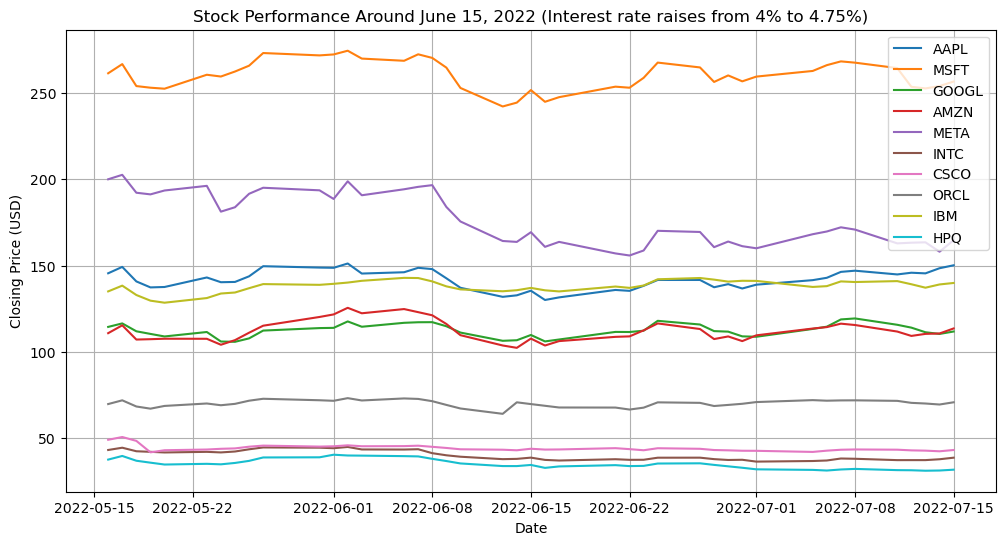

In [10]:
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(fedrate2_window.index, fedrate2_window[ticker], label=ticker)
plt.title("Stock Performance Around June 15, 2022 (Interest rate raises from 4% to 4.75%)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid()

plt.show()

From this graph we can see that the companies with higher reserves dropped more than the companies with average reserves. The companies with average reserves did not gain or lose much from this event and stayed stagnant however the companies with larger reserves dropped and stayed at that level.

In [11]:
sc_covid = datetime(2020, 1, 23)

This is the first example of supply chain disruptions due to COVID-19. On this date, Wuhan was locked down.

In [12]:
sccovid_window = stock_data.loc[sc_covid - pd.Timedelta(days=30):sc_covid + pd.Timedelta(days=30)]
sccovid_window.head()

Ticker,AAPL,AMZN,CSCO,GOOGL,HPQ,IBM,INTC,META,MSFT,ORCL
Date,,,,,,,,,,
2020-01-02,75.087502,94.900497,48.419998,68.433998,20.790001,129.464630,60.840000,209.779999,160.619995,53.950001
2020-01-03,74.357498,93.748497,47.630001,68.075996,20.530001,128.432129,60.099998,208.669998,158.619995,53.759998
2020-01-06,74.949997,95.143997,47.799999,69.890503,20.610001,128.202682,59.930000,212.600006,159.029999,54.040001
2020-01-07,74.597504,95.343002,47.490002,69.755501,20.660000,128.288712,58.930000,213.059998,157.580002,54.160000
2020-01-08,75.797501,94.598503,47.520000,70.251999,20.930000,129.359467,58.970001,215.220001,160.089996,54.130001


subset of the stock data 30 days before and after January 23, 2020

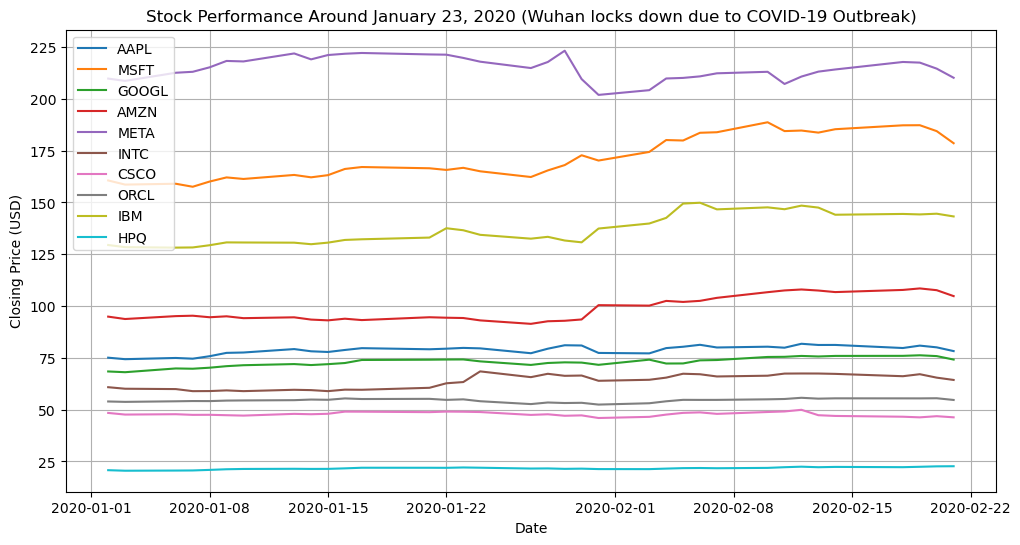

In [13]:
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(sccovid_window.index, sccovid_window[ticker], label=ticker)
plt.title("Stock Performance Around January 23, 2020 (Wuhan locks down due to COVID-19 Outbreak)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid()

plt.show()

In this graph we can see that all companies were not impacted by Wuhan locking down but instead most gained instead of dropping.

In [14]:
sc_covid2 = datetime(2020, 3, 11)

This is the second example of supply chain disruptions due to COVID-19. On this date, the WHO declared COVID-19 as a global pandemic.

In [15]:
sccovid_window2 = stock_data.loc[sc_covid2 - pd.Timedelta(days=30):sc_covid2 + pd.Timedelta(days=30)]
sccovid_window2.head()

Ticker,AAPL,AMZN,CSCO,GOOGL,HPQ,IBM,INTC,META,MSFT,ORCL
Date,,,,,,,,,,
2020-02-10,80.387497,106.695503,48.869999,75.432999,21.900000,147.638626,66.389999,213.059998,188.699997,54.990002
2020-02-11,79.902496,107.540001,49.130001,75.502998,22.230000,146.730408,67.410004,207.190002,184.440002,55.150002
2020-02-12,81.800003,108.000000,49.930000,75.931503,22.480000,148.479919,67.459999,210.759995,184.710007,55.730000
2020-02-13,81.217499,107.493500,47.320000,75.669502,22.219999,147.523895,67.440002,213.139999,183.710007,55.310001
2020-02-14,81.237503,106.743500,46.970001,75.936501,22.370001,144.072662,67.269997,214.179993,185.350006,55.470001


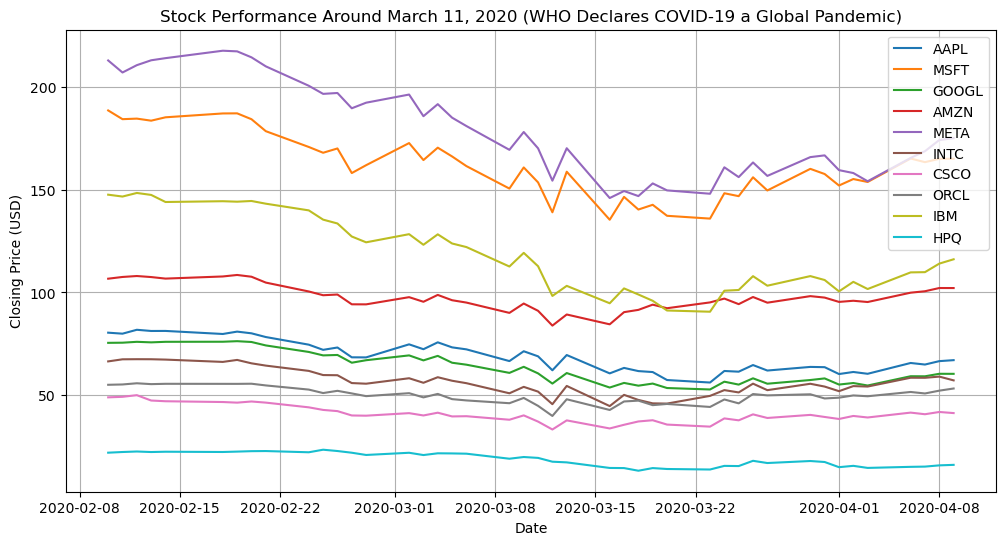

In [16]:
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(sccovid_window2.index, sccovid_window2[ticker], label=ticker)
plt.title("Stock Performance Around March 11, 2020 (WHO Declares COVID-19 a Global Pandemic)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid()

plt.show()

Compared to the other COVID graph this one shows a very different story. The day that the WHO declared COVID-19 a global pandemic all stocks dropped even if they had a lot or little cash reserves. I think this graph is vastly different from the other COVID one because this is when it was declared a GLOBAL pandemic but the other one was just Wuhan locking down.

In [17]:
rus_ukr = datetime(2022, 2, 24)

This is the first example of the Russia-Ukraine conflict. On this date, Russia invaded Ukraine.

In [18]:
rusukr_window = stock_data.loc[rus_ukr - pd.Timedelta(days=30):rus_ukr + pd.Timedelta(days=30)]
rusukr_window.head()

Ticker,AAPL,AMZN,CSCO,GOOGL,HPQ,IBM,INTC,META,MSFT,ORCL
Date,,,,,,,,,,
2022-01-25,159.779999,139.985992,56.110001,126.934998,34.980000,136.100006,51.000000,300.149994,288.489990,81.070000
2022-01-26,159.690002,138.872498,55.330002,129.233002,35.230000,134.259995,51.689999,294.630005,296.709991,79.589996
2022-01-27,159.220001,139.637497,54.619999,129.005005,35.209999,132.520004,48.049999,294.640015,299.839996,79.779999
2022-01-28,170.330002,143.977997,55.610001,133.350998,36.299999,134.500000,47.730000,301.709991,308.260010,80.480003
2022-01-31,174.779999,149.573502,55.669998,135.303497,36.730000,133.570007,48.820000,313.260010,310.980011,81.160004


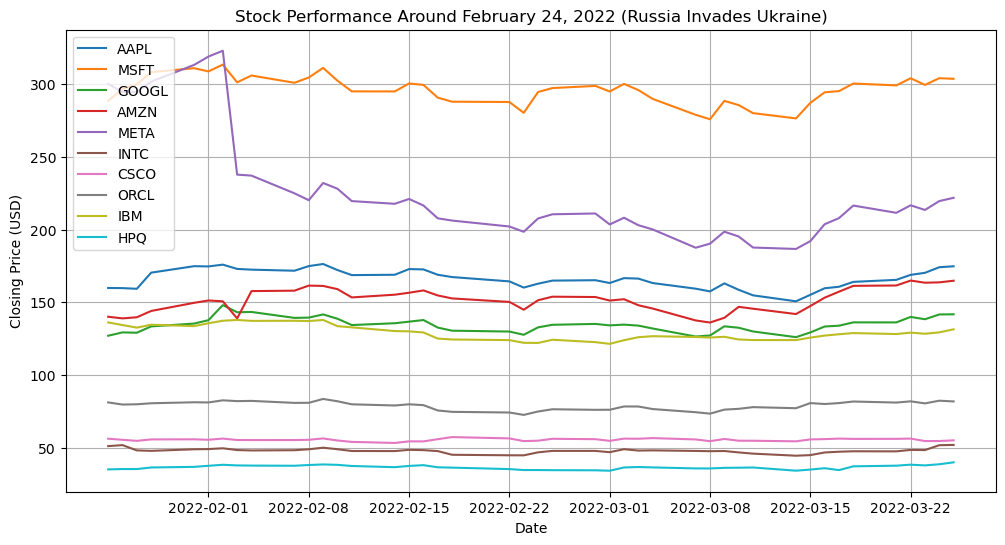

In [19]:
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(rusukr_window.index, rusukr_window[ticker], label=ticker)
plt.title("Stock Performance Around February 24, 2022 (Russia Invades Ukraine)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid()

plt.show()

This graph does not show much of change in any of the stocks. META dropped a lot because it lost over $200 million in value after they issued a dismal forecast which was unrelated. This graph is similar to the Wuhan lockdown because this is something that happened overseas and did not fully impact the stock market just yet.

In [20]:
rus_ukr2 = datetime(2022, 3, 8)

This is the second example of the Russia-Ukraine conflict. On this date, the United States banned oil imports from Russia.

In [21]:
rusukr_window2 = stock_data.loc[rus_ukr2 - pd.Timedelta(days=30):rus_ukr2 + pd.Timedelta(days=30)]
rusukr_window2.head()

Ticker,AAPL,AMZN,CSCO,GOOGL,HPQ,IBM,INTC,META,MSFT,ORCL
Date,,,,,,,,,,
2022-02-07,171.660004,157.935501,55.169998,139.201004,37.490002,137.240005,48.180000,224.910004,300.950012,80.739998
2022-02-08,174.830002,161.413498,55.340000,139.399002,38.000000,137.020004,48.810001,220.179993,304.559998,80.790001
2022-02-09,176.279999,161.189499,56.290001,141.591995,38.400002,137.789993,49.910000,232.000000,311.209991,83.449997
2022-02-10,172.119995,159.003494,54.869999,138.619995,38.110001,133.520004,48.860001,228.070007,302.380005,81.849998
2022-02-11,168.639999,153.293503,53.900002,134.282501,37.330002,132.690002,47.630001,219.550003,295.040009,79.750000


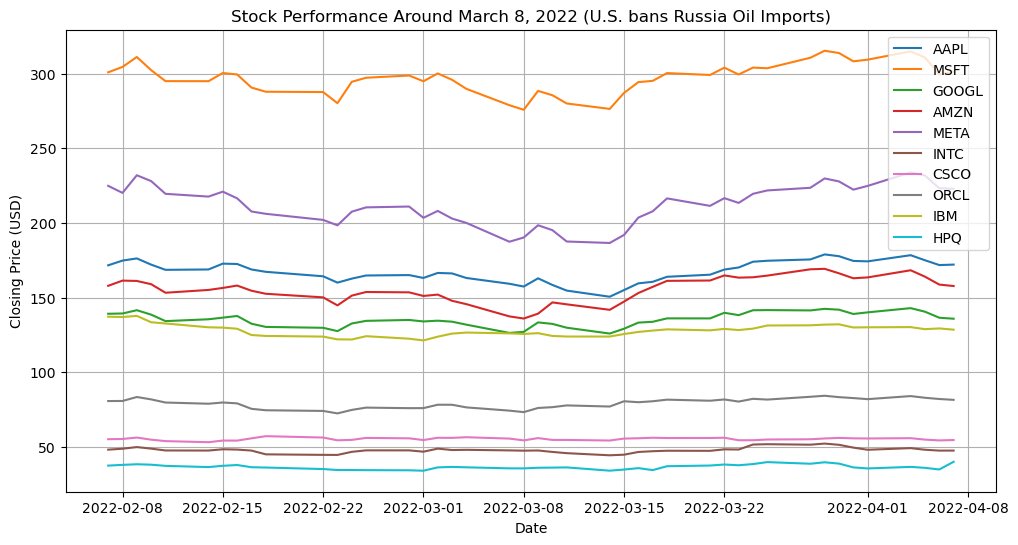

In [22]:
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(rusukr_window2.index, rusukr_window2[ticker], label=ticker)
plt.title("Stock Performance Around March 8, 2022 (U.S. bans Russia Oil Imports)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid()

plt.show()

This graph shows that many stocks actually benefitted from this than suffered. In this case since Russian oil imports were banned it led to more consumer spending with more American based companies therefore benefitting these stocks.

In [23]:
us_chn = datetime(2022, 10, 7)

This is the first example of economic uncertainty due to the US-China trade and technology tensions. On this date, U.S. export controls that restrict China's access to semiconductor technologies.

In [24]:
uschn_window = stock_data.loc[us_chn - pd.Timedelta(days=30):us_chn + pd.Timedelta(days=30)]
uschn_window.head()

Ticker,AAPL,AMZN,CSCO,GOOGL,HPQ,IBM,INTC,META,MSFT,ORCL
Date,,,,,,,,,,
2022-09-07,155.960007,129.479996,45.020000,109.449997,27.469999,127.709999,30.650000,160.389999,258.089996,74.489998
2022-09-08,154.460007,129.820007,45.369999,108.379997,27.500000,128.470001,30.750000,162.059998,258.519989,74.650002
2022-09-09,157.369995,133.270004,45.770000,110.650002,28.260000,129.190002,31.459999,169.149994,264.459991,75.910004
2022-09-12,163.429993,136.449997,46.400002,110.860001,28.510000,130.660004,31.559999,168.960007,266.649994,77.080002
2022-09-13,153.839996,126.820000,44.110001,104.320000,26.959999,127.250000,29.290001,153.130005,251.990005,76.040001


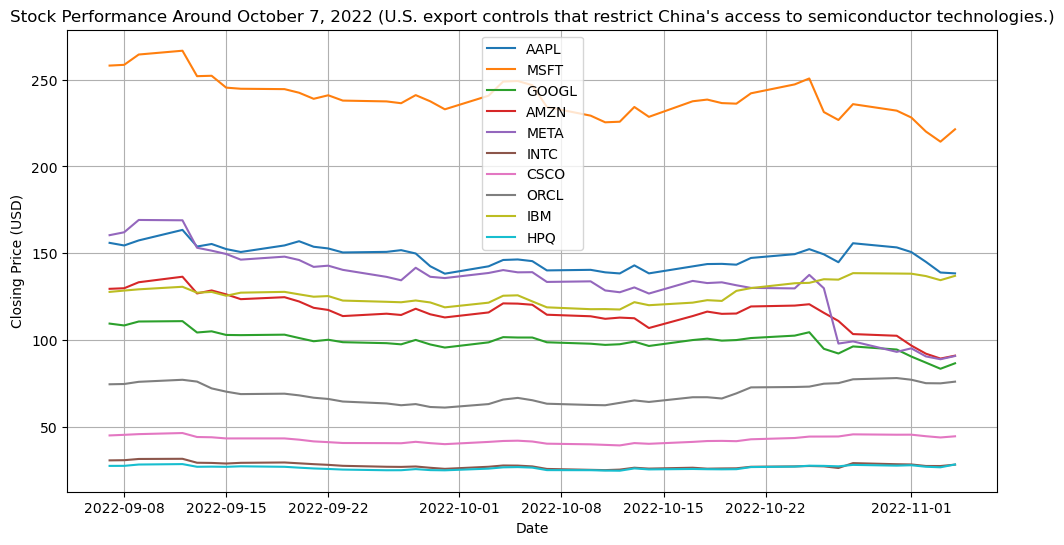

In [25]:
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(uschn_window.index, uschn_window[ticker], label=ticker)
plt.title("Stock Performance Around October 7, 2022 (U.S. export controls that restrict China's access to semiconductor technologies.)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid()

plt.show()

In this graph we can see that the higher reserve stocks suffered a lot more from the export restrictions compared to the average reserve stocks. This is because many of these companies use these technologies from China and because many of their exports they were using became restricted it had them producing their technologies slower than they usually are able to. In this graph we can see that Google, Meta, and Amazon suffered the most. Apple and Microsoft also suffered with their stock price being lower than it usually it is but it was not as drastic as the other 3.

In [26]:
us_chn2 = datetime(2023, 8, 9)

This is the second example of economic uncertainty due to the US-China trade and technology tensions. On this date, the U.S. put in an executive order restricting outbound investments in chinese tech.

In [27]:
uschn_window2 = stock_data.loc[us_chn2 - pd.Timedelta(days=30):us_chn2 + pd.Timedelta(days=30)]
uschn_window2.head()

Ticker,AAPL,AMZN,CSCO,GOOGL,HPQ,IBM,INTC,META,MSFT,ORCL
Date,,,,,,,,,,
2023-07-10,188.610001,127.129997,51.400002,116.449997,31.540001,132.899994,32.740002,294.100006,331.829987,114.379997
2023-07-11,188.080002,128.779999,52.119999,117.139999,33.450001,134.440002,33.299999,298.290009,332.470001,114.879997
2023-07-12,189.770004,130.800003,50.740002,118.930000,32.900002,132.839996,33.980000,309.339996,337.200012,116.019997
2023-07-13,190.539993,134.300003,51.529999,124.540001,33.560001,133.919998,33.869999,313.410004,342.660004,117.449997
2023-07-14,190.690002,134.679993,50.380001,125.419998,32.790001,133.399994,33.150002,308.869995,345.239990,119.269997


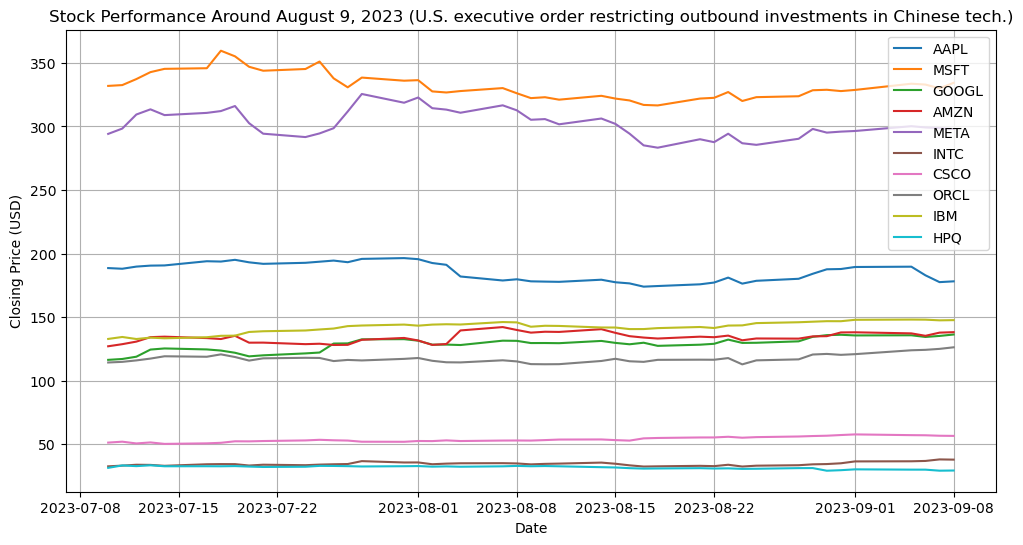

In [28]:
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(uschn_window2.index, uschn_window2[ticker], label=ticker)
plt.title("Stock Performance Around August 9, 2023 (U.S. executive order restricting outbound investments in Chinese tech.)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid()

plt.show()

In this graph we do not see any drastic changes. I believe this is because since the export restrictions many companies started moving away from using and investing in Chinese technologies. 

In [29]:
lm_shift = datetime(2021, 7, 13)

This is the first example of economic uncertainty due to labor market shifts. On this date, there was a record inflation surge of 5.4%.

In [30]:
lms_window = stock_data.loc[lm_shift - pd.Timedelta(days=30):lm_shift + pd.Timedelta(days=30)]
lms_window.head()

Ticker,AAPL,AMZN,CSCO,GOOGL,HPQ,IBM,INTC,META,MSFT,ORCL
Date,,,,,,,,,,
2021-06-14,130.479996,169.193497,54.169998,122.445503,29.389999,143.432129,58.189999,336.769989,259.890015,82.620003
2021-06-15,129.639999,169.156494,53.790001,121.419502,29.590000,142.791580,57.990002,336.750000,258.359985,81.639999
2021-06-16,130.149994,170.762497,53.470001,120.772499,29.030001,141.328873,57.220001,331.079987,257.380005,77.080002
2021-06-17,131.789993,174.462006,53.130001,121.743500,28.639999,139.196945,57.180000,336.510010,260.899994,77.559998
2021-06-18,130.460007,174.345001,52.070000,120.111000,28.670000,136.826004,55.669998,329.660004,259.429993,76.230003


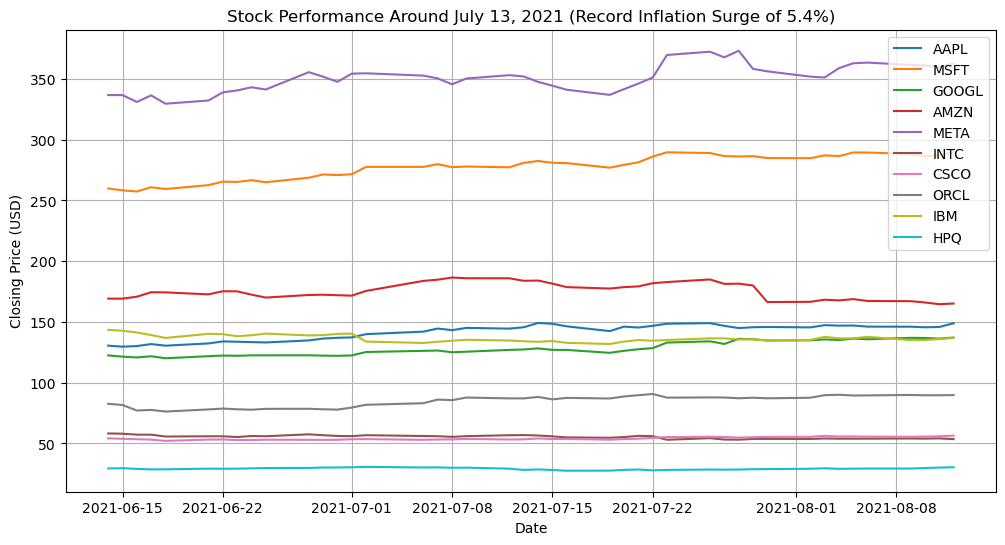

In [31]:
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(lms_window.index, lms_window[ticker], label=ticker)
plt.title("Stock Performance Around July 13, 2021 (Record Inflation Surge of 5.4%)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid()

plt.show()

In this graph there is no notable shift. I think there is no shift in stock prices despite record inflation surge because this is when it was only officially reported instead of it happening all of the sudden. This is still an example of economic uncertainty because at this time for normal people prices were higher than they have had been in years past.

In [32]:
lm_shift2 = datetime(2022, 2, 4)

This is the second example of economic uncertainty due to labor market shifts. On this date, U.S. wage growth hit 5.1%.

In [33]:
lms_window2 = stock_data.loc[lm_shift2 - pd.Timedelta(days=30):lm_shift2 + pd.Timedelta(days=30)]
lms_window2.head()

Ticker,AAPL,AMZN,CSCO,GOOGL,HPQ,IBM,INTC,META,MSFT,ORCL
Date,,,,,,,,,,
2022-01-05,174.919998,164.356995,60.279999,137.774994,38.869999,138.220001,53.869999,324.170013,316.380005,86.459999
2022-01-06,172.000000,163.253998,60.919998,137.747498,38.680000,135.339996,54.009998,332.459991,313.880005,86.339996
2022-01-07,172.169998,162.554001,61.130001,137.016998,38.650002,134.830002,53.439999,331.790009,314.040009,87.510002
2022-01-10,172.190002,161.485992,61.820000,138.669495,38.959999,135.029999,55.209999,328.070007,314.269989,89.279999
2022-01-11,175.080002,165.362000,62.369999,139.735992,39.189999,132.869995,55.910000,334.369995,314.980011,88.480003


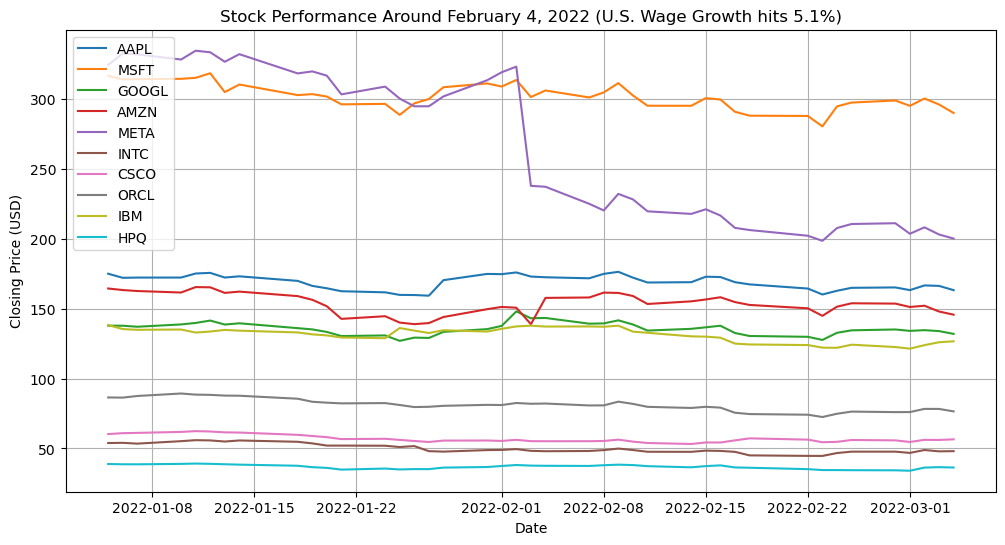

In [34]:
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(lms_window2.index, lms_window2[ticker], label=ticker)
plt.title("Stock Performance Around February 4, 2022 (U.S. Wage Growth hits 5.1%)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid()

plt.show()

In this final graph we do not see a major shift in many of the stocks. META dropped a lot because it lost over $200 million in value after they issued a dismal forecast which was unrelated. This was also a period of economic uncertainty despite it not being shown in the stock market. As a result of record inflation at this time, wage growth also increased. This does not impact these bigger companies.

To conclude all of this data that the graphs show, companies with higher reserves often took more significant hits during events like increases in reserve interest rates or export restrictions, while those with average reserves remained relatively stable. Events such as the WHO's declaration of COVID-19 as a global pandemic had a negative effect across all stocks, while localized events like Wuhan's lockdown saw minimal effects on stocks, possibly due to a lack of immediate global impact. The Russian oil import ban benefited American companies as consumer spending shifted, whereas export restrictions hurt high-reserve companies who use Chinese technologies. Inflation reporting did not lead to notable stock shifts, reflecting delayed market reactions despite economic uncertainty. Notably, company-specific issues, such as Meta's significant drop due to a dismal forecast, underline how external factors can sometimes amplify or obscure broader trends 